In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import warnings
import random
#warnings.filterwarnings('ignore')

In [4]:
dfCity=pd.read_csv("../data/waste.csv",sep=';')
dfCity.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11,18.286006


In [5]:
dfCity.shape # high level understanding

(53334, 9)

In [6]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53334 entries, 0 to 53333
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item                   53334 non-null  float64
 1   food_category          53334 non-null  object 
 2   reason                 53334 non-null  object 
 3   location               53334 non-null  object 
 4   kitchen_type           53334 non-null  object 
 5   article_or_ingredient  53334 non-null  object 
 6   measure_type           53334 non-null  object 
 7   date                   53334 non-null  object 
 8   waste                  53334 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.7+ MB


In [7]:
# find out the unique value to make categorical variable
print('food_category')
print(*list(dfCity.food_category.unique()))
print('reason')
print(*list(dfCity.reason.unique()))
print('location')
print(*list(dfCity.location.unique()))
print('kitchen_type')
print(*list(dfCity.kitchen_type.unique()))
print('article_or_ingredient')
print(*list(dfCity.article_or_ingredient.unique()))
print('measure_type')
print(*list(dfCity.measure_type.unique()))
print('waste')
print(*list(dfCity.waste.unique()))
print('ITEM')
print(*list(dfCity.item.unique()))


food_category
Extra toppings Meat Potato, Grains & Pasta Sandwich Fruit & Vegetables Main Course Desserts & Pastries Vegetarian Sauces, Jams & Condiments Snacks Vegetables Bread Soup Beverages Fish & Seafood Breakfast Dairy & Eggs Other
reason
Prepared-Edible Exc. Prepared-Expired Inventory Spoilage No Reason Provided Handling & Cooking Sampling Trim Waste
location
Barcelona Madrid
kitchen_type
B C A
article_or_ingredient
Article Ingredient
measure_type
automatic manual_1 manual_2
waste
13.906041852374816 11.592152517975252 26.35105310988538 23.008215923882496 18.286005578036992 41.753778272151614 31.69192326129798 12.015739677606202 31.05443607602624 10.216555192431548 44.77028032076636 22.87745615229106 2.319051530259731 15.632594154522147 44.75911080439378 17.12828070764839 12.222029291406562 10.694765074558674 20.35627667330153 9.18574983330158 36.25435146296235 14.296083379723273 20.109152145229796 16.6846636166271 32.4711872280642 119.18212114239284 27.82764812196676 21.803164907

WASTE DATASET. 
Warning: This file uses ";" as column separator and "." for decimals

(1) item: [integer] Item unique number to identify the food waste. 

(2) food_category: [string] Different food categories: 'Beverages','Bread','Breakfast','Dairy & Eggs','Desserts & Pastries','Extra toppings','Fish & Seafood','Fruit & Vegetables','Main Course','Meat','Other','Potato, Grains & Pasta','Sandwich','Sauces, Jams & Condiments','Snacks','Soup','Vegetables','Vegetarian'.

(3) reason: [string] Reason why food was considered a waste. Categories: 'Handling & Cooking','Inventory Spoilage','No Reason Provided','Prepared-Edible Exc.','Prepared-Expired','Sampling','Trim Waste'.

(4) location: [string] Locations are 'Barcelona' and 'Madrid'.

(5) kitchen_type: [string] Three different types of kitchens: 'A', 'B' and 'C'.

(6) article_or_ingredient: [string] Can be either 'article' or 'ingredient'.

(7) measure_type: [string] Three different types of kitchens: 'automatic', 'manual_1' and 'manual_2'.

(8) date: [string]: yyyy-mm-dd hh (Date and hour).

(9) waste: [float] Quantity of waste. You can consider this measurement as weight although the unit is not kilograms nor other weight unit.


In [8]:
# Total number of rows and columns
dfCity.shape
#(21613, 23)
print(dfCity.shape)
# Rows containing duplicate data
duplicate_rows_df = dfCity[dfCity.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
duplicate_rows_df


(53334, 9)
number of duplicate rows:  (482, 9)


,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
1635,92.0,Meat,Inventory Spoilage,Barcelona,B,Ingredient,manual_1,2021-09-28 09,10.216555
2028,672.0,Desserts & Pastries,No Reason Provided,Barcelona,B,Ingredient,manual_2,2021-05-08 10,8.023590
2266,994.0,Main Course,Inventory Spoilage,Barcelona,B,Article,manual_2,2022-04-11 12,17.446432
4681,1128.0,Bread,Sampling,Madrid,C,Article,manual_1,2022-10-01 16,10.600849
5265,507.0,Snacks,No Reason Provided,Barcelona,A,Article,manual_2,2021-07-24 10,11.890248
...,...,...,...,...,...,...,...,...,...
52997,282.0,Meat,Inventory Spoilage,Barcelona,B,Ingredient,manual_2,2022-05-23 12,2.319052
53107,963.0,Snacks,Sampling,Madrid,C,Article,manual_1,2022-07-28 09,12.424894
53125,996.0,Meat,Inventory Spoilage,Madrid,C,Article,manual_1,2021-08-11 11,22.458361
53192,1076.0,Sandwich,Handling & Cooking,Madrid,B,Article,manual_1,2022-05-28 14,12.222029


In [9]:
dfCity.food_category=pd.Categorical(dfCity.food_category)
dfCity.reason=pd.Categorical(dfCity.reason)
dfCity.location=pd.Categorical(dfCity.location)
dfCity.kitchen_type=pd.Categorical(dfCity.kitchen_type)
dfCity.article_or_ingredient=pd.Categorical(dfCity.article_or_ingredient)
dfCity.measure_type=pd.Categorical(dfCity.measure_type)
dfCity.date = pd.to_datetime(dfCity.date, format='%Y-%m-%d %H')
dfCity.item = dfCity.item.astype('int16')

In [10]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53334 entries, 0 to 53333
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   item                   53334 non-null  int16         
 1   food_category          53334 non-null  category      
 2   reason                 53334 non-null  category      
 3   location               53334 non-null  category      
 4   kitchen_type           53334 non-null  category      
 5   article_or_ingredient  53334 non-null  category      
 6   measure_type           53334 non-null  category      
 7   date                   53334 non-null  datetime64[ns]
 8   waste                  53334 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(1), int16(1)
memory usage: 1.2 MB


In [11]:
dfCity.describe().T #only display numeric cloumn also
#dfCity.describe(include='all').T #include non-numeric cloumn also

,count,mean,min,25%,50%,75%,max,std
item,53334.0,519.890951,0.0,258.0,498.0,804.0,1159.0,324.852274
date,53334,2022-03-05 14:27:59.311508480,2021-02-02 08:00:00,2021-10-04 15:00:00,2022-03-15 21:00:00,2022-08-11 08:00:00,2022-12-31 18:00:00,NaN
waste,53334.0,23.224077,2.092367,12.820998,19.413342,29.383295,223.616587,15.996438


In [24]:
## NO SIRVE PORQUE HAY QUE CLUSTERIZAR PARA VER LOS OUTLIERS DE CADA CLUSTER O AGRUPACION
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [23]:
findoutliers(dfCity.waste)

array([119.18212114,  58.51818521,  63.28015487, ...,  58.00325853,
        67.11466308, 106.884882  ])

In [26]:
print(len(findoutliers(dfCity.waste))) #no of rows having outlier

2198


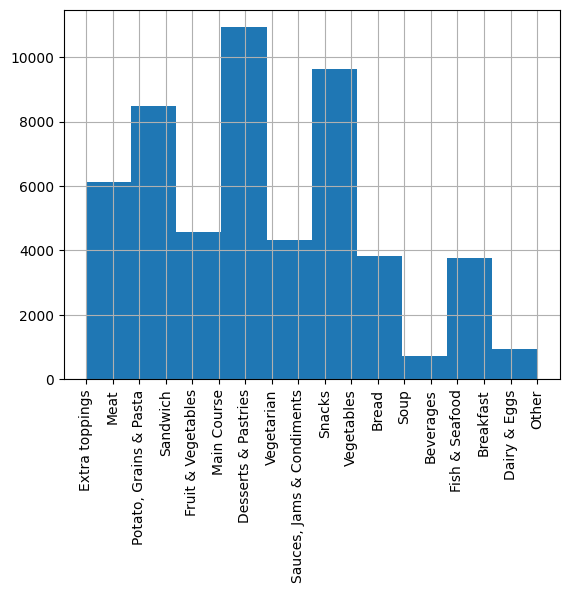

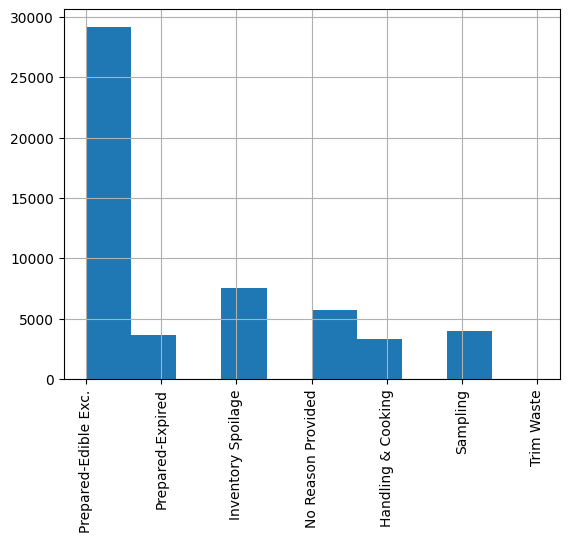

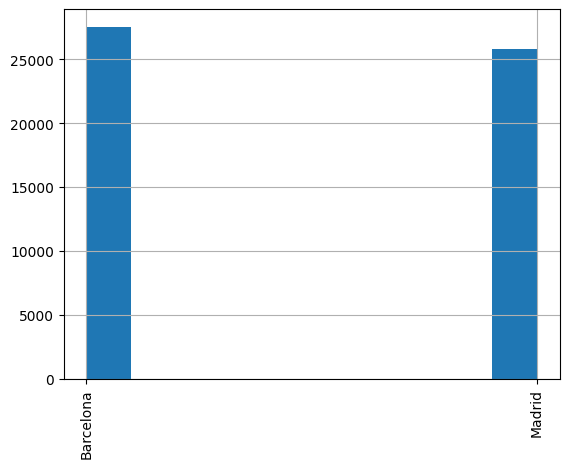

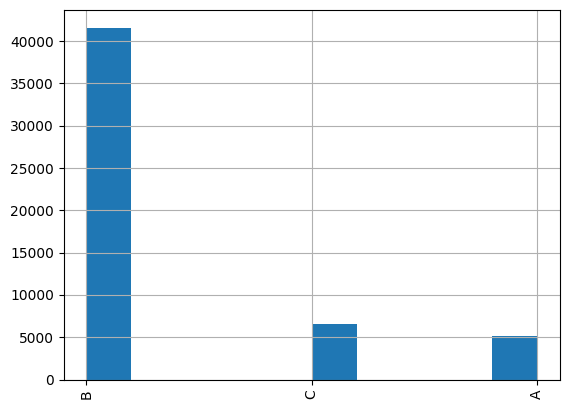

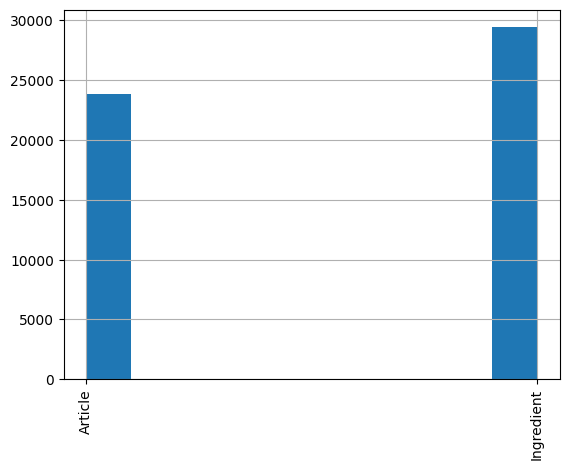

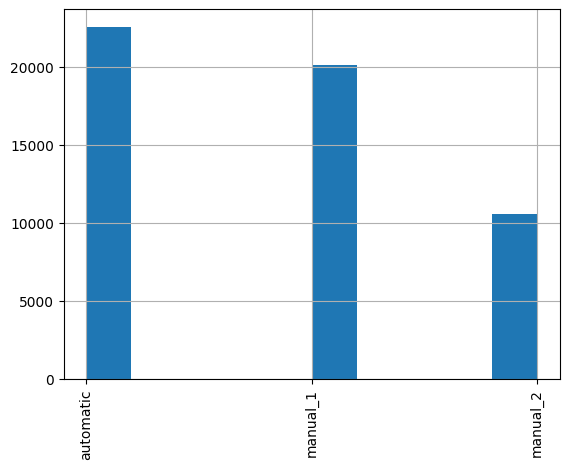

In [33]:
cols=dfCity.select_dtypes(include=['category']).columns
for i in cols:
    # crear una nueva imagen
    plt.figure()
    # girar las etiquetas del eje x
    plt.xticks(rotation=90)
    dfCity[i].hist()


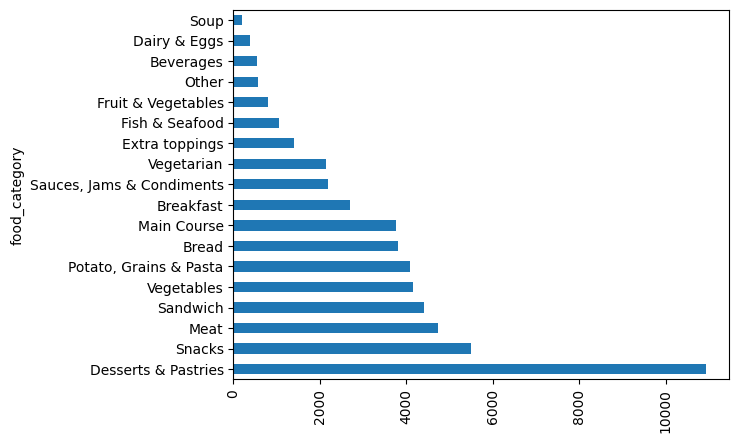

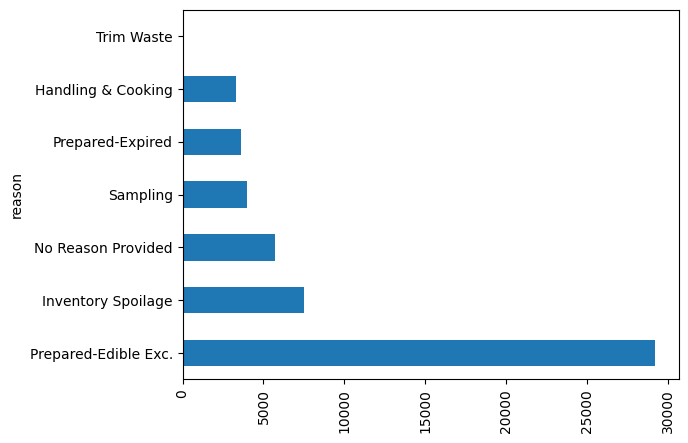

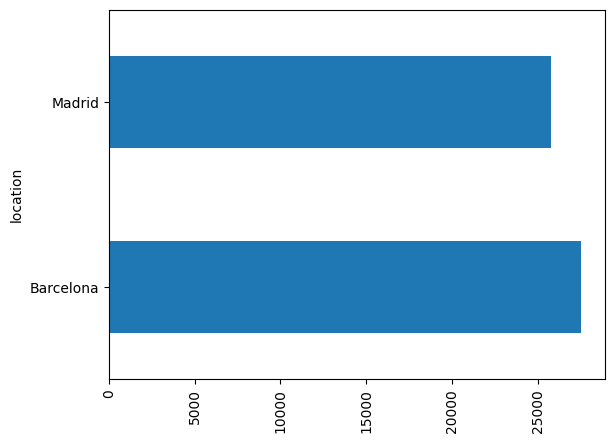

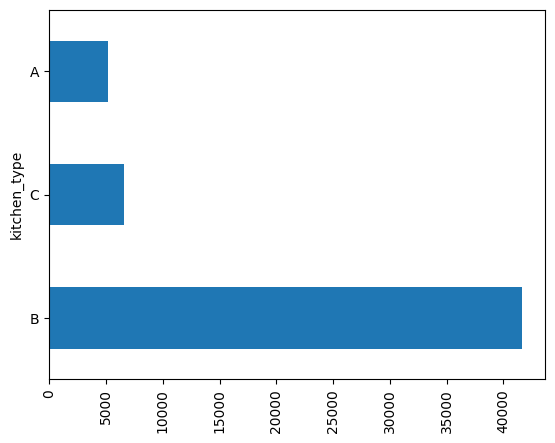

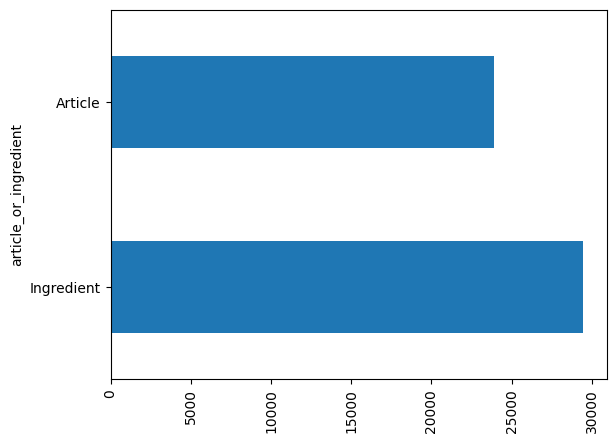

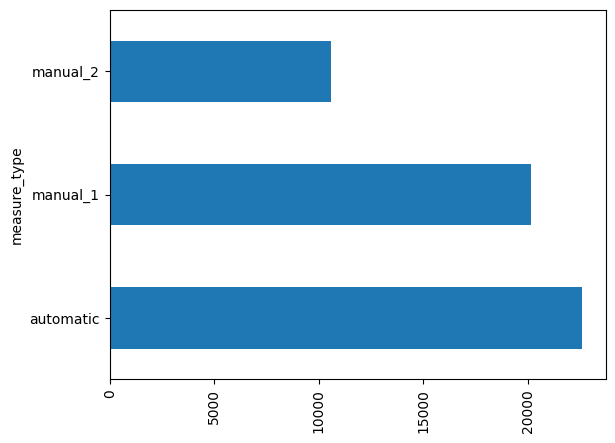

In [96]:
cols=dfCity.select_dtypes(include=['category']).columns
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in list(range(len(cols)))]
for i in cols:
    # crear una nueva imagen
    plt.figure()
    # girar las etiquetas del eje x
    plt.xticks(rotation=90)
    # mostar los valores de la columna ordenados de menor a mayor y girados 90 grados 
    dfCity[i].value_counts().plot(kind='barh')


C:\Users\juano\AppData\Local\Temp\ipykernel_13004\1326215233.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)


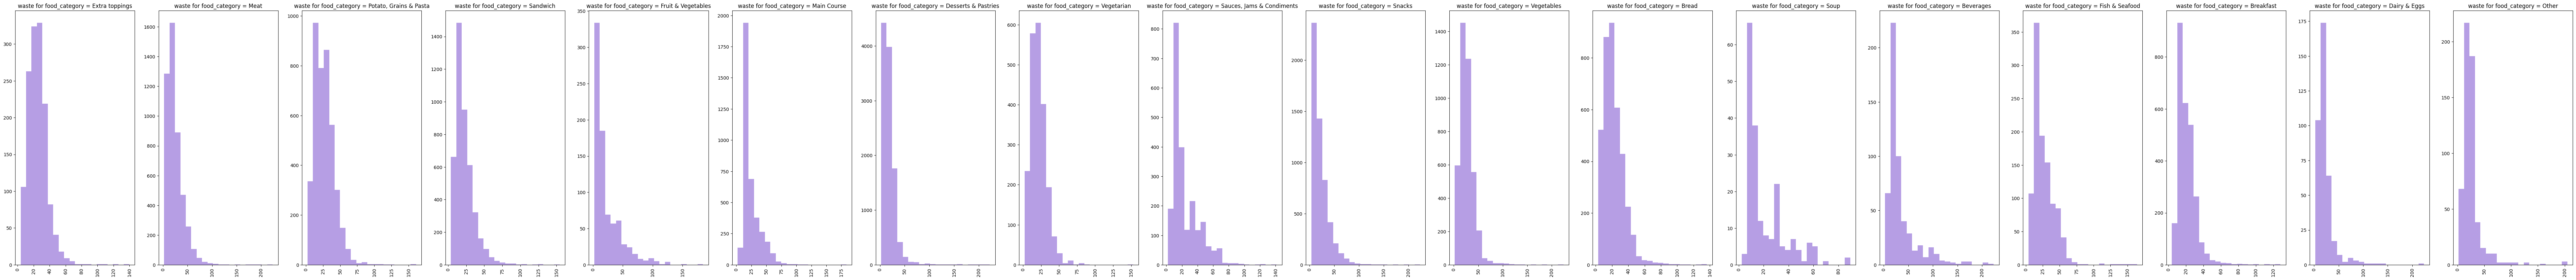

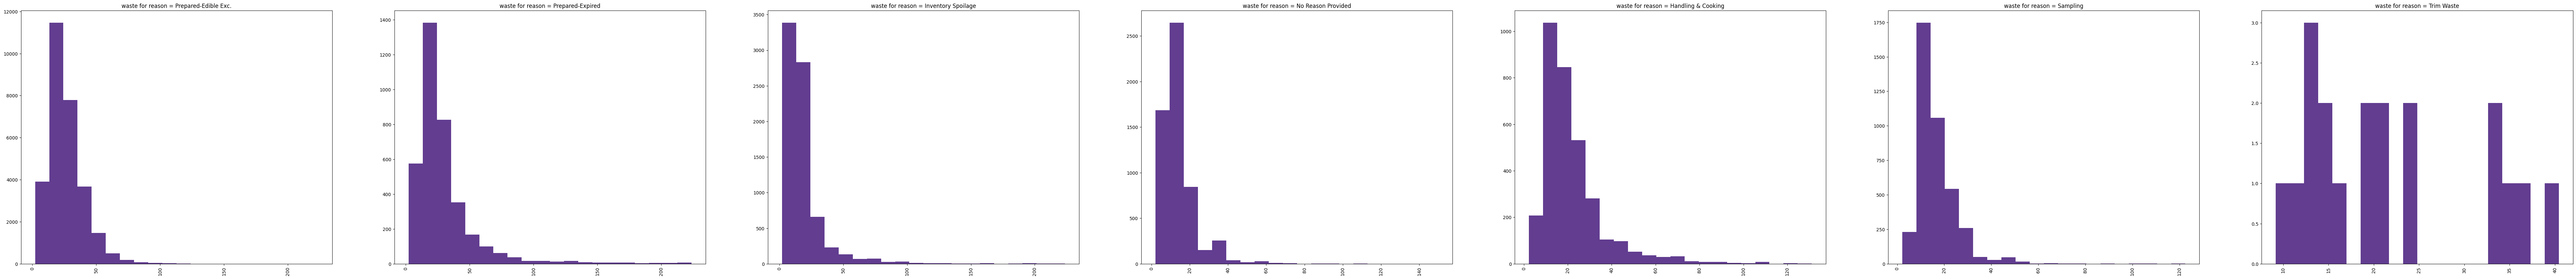

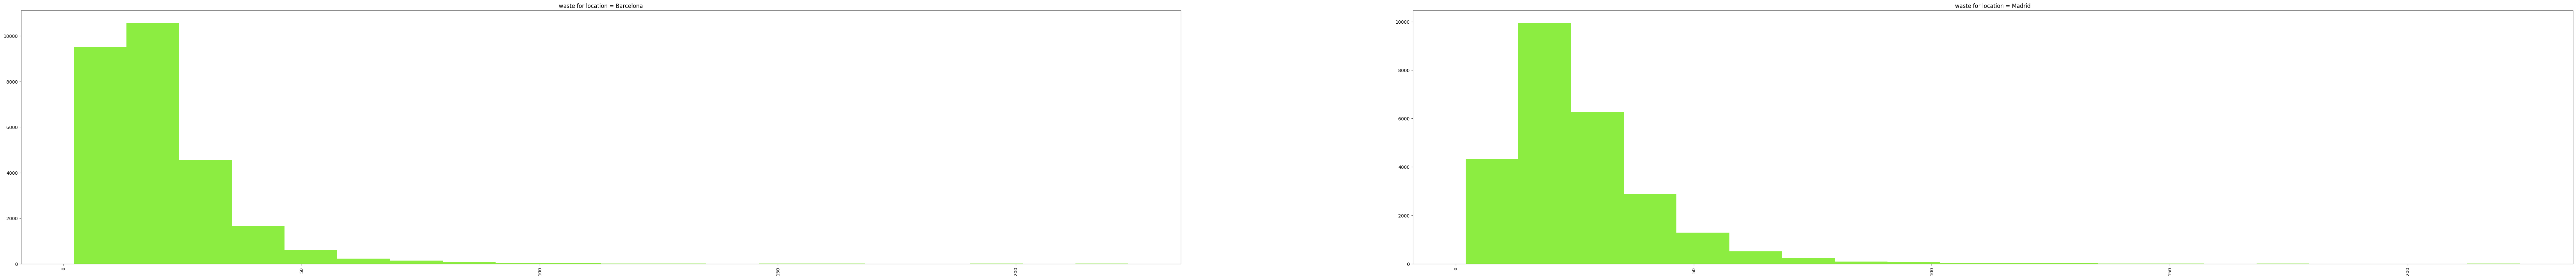

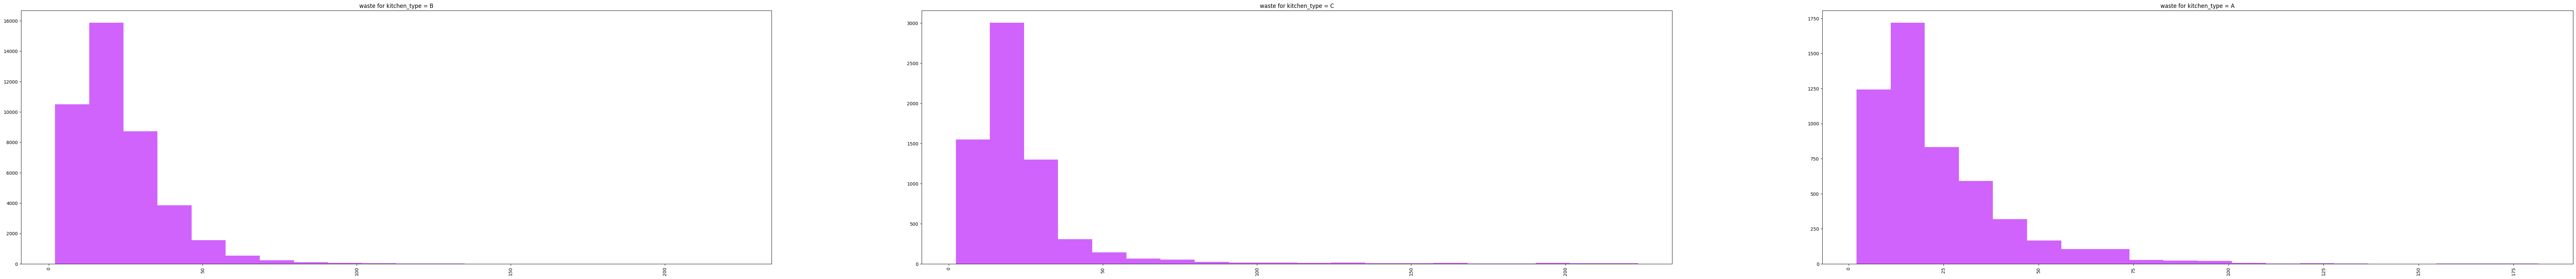

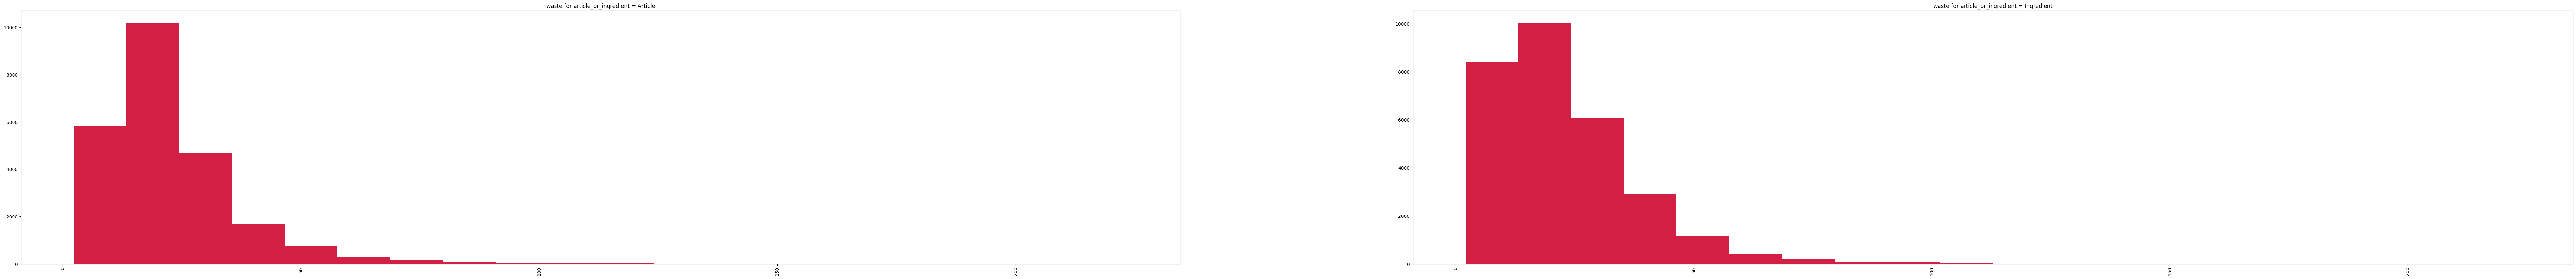

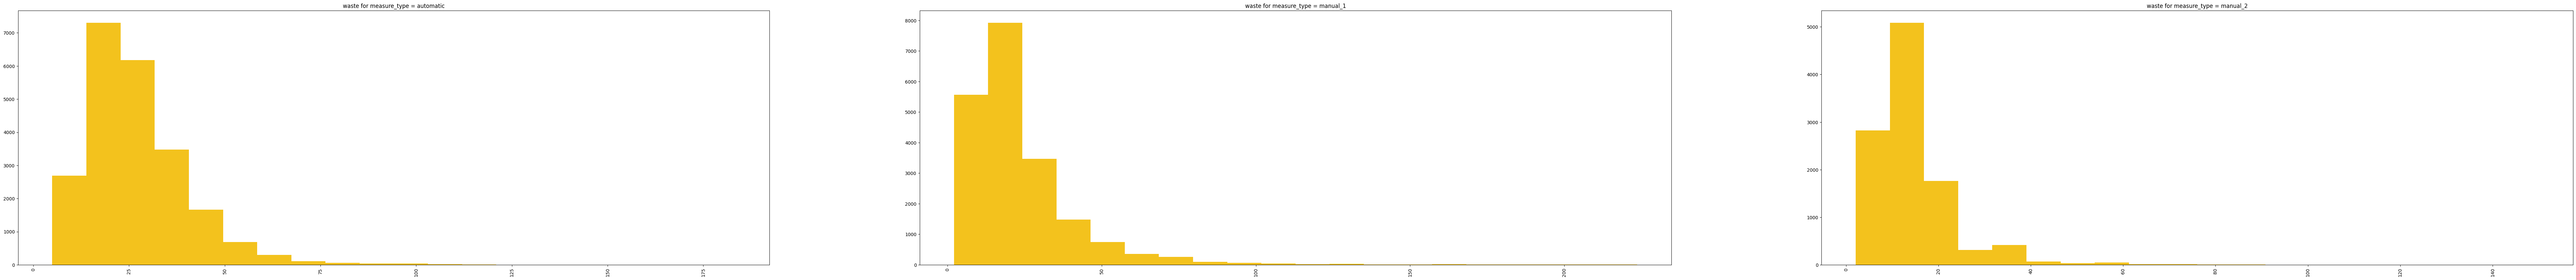

In [97]:
# por cada valor de cada columna categórica plotear un histograma de la variable waste
cols_aux=['food_category','location']
for num_col,i in enumerate(cols):
    # crear subplots para cada conjunto de valores de la columna i 
    fig, ax = plt.subplots(nrows=1, ncols=len(dfCity[i].unique()), figsize=(100, 10))
    for num_val,j in enumerate(dfCity[i].unique()):
        # ploteamos el titulo de cada subplot columna i, valor j, waste
        ax[num_val].set_title('waste for {} = {}'.format(i,j))
        # plotear la curva de densidad con matplot de waste para cada valor de la columna i 
        ax[num_val].hist(dfCity[dfCity[i]==j]['waste'], bins=20, color=colors[num_col])
        # rotar las etiquetas del eje x para cada subplot
        ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)

C:\Users\juano\AppData\Local\Temp\ipykernel_13004\3932676848.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)
C:\Users\juano\AppData\Local\Temp\ipykernel_13004\3932676848.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)
C:\Users\juano\AppData\Local\Temp\ipykernel_13004\3932676848.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)
C:\Users\juano\AppData\Local\Temp\ipykernel_13004\3932676848.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)
C:\Users\juano\AppData\Local\Temp\ipykernel_13004\3932676848.py:11: UserWarning: FixedFormatter should only be used together with Fi

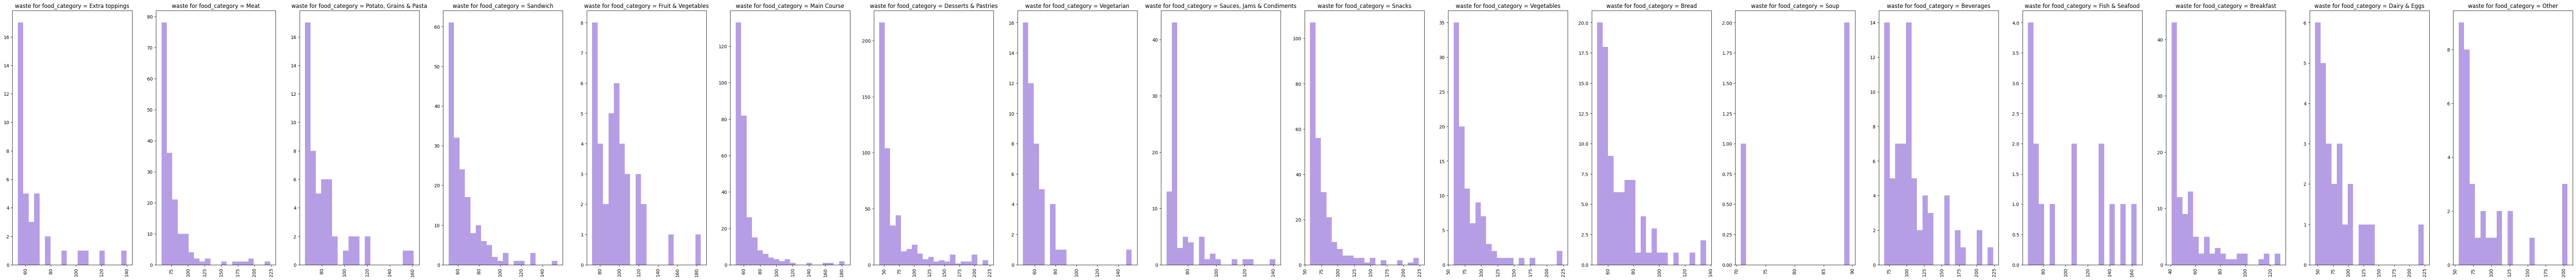

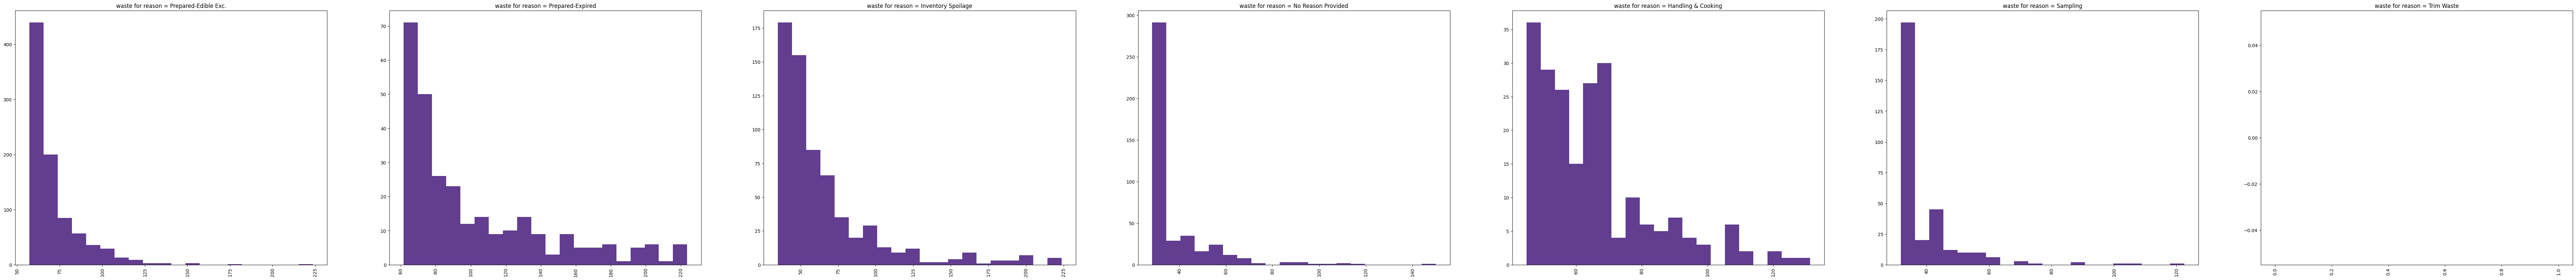

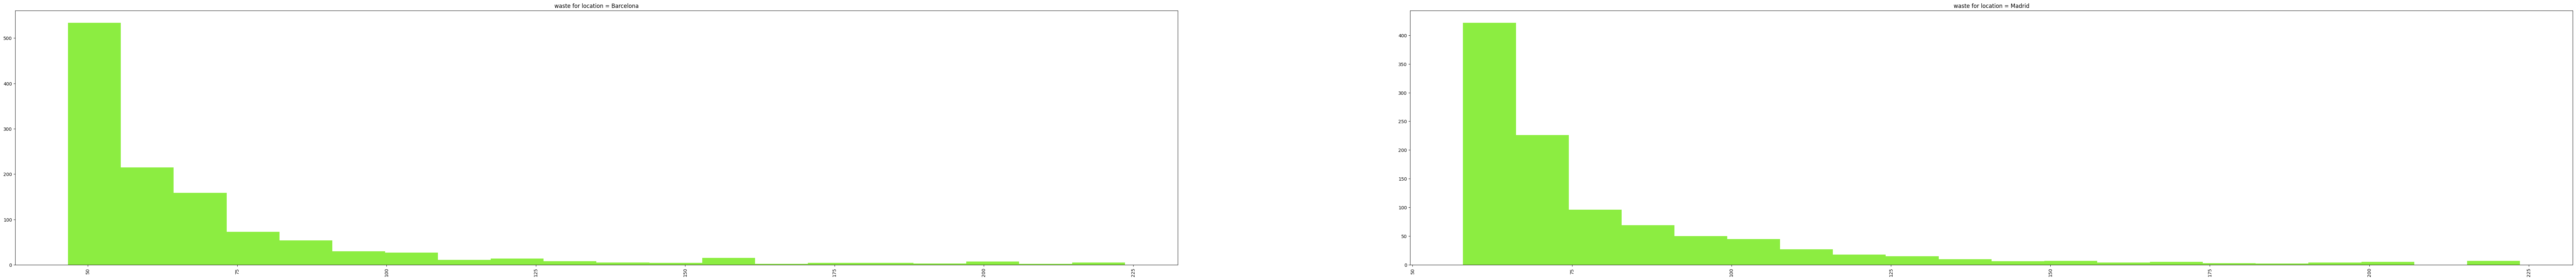

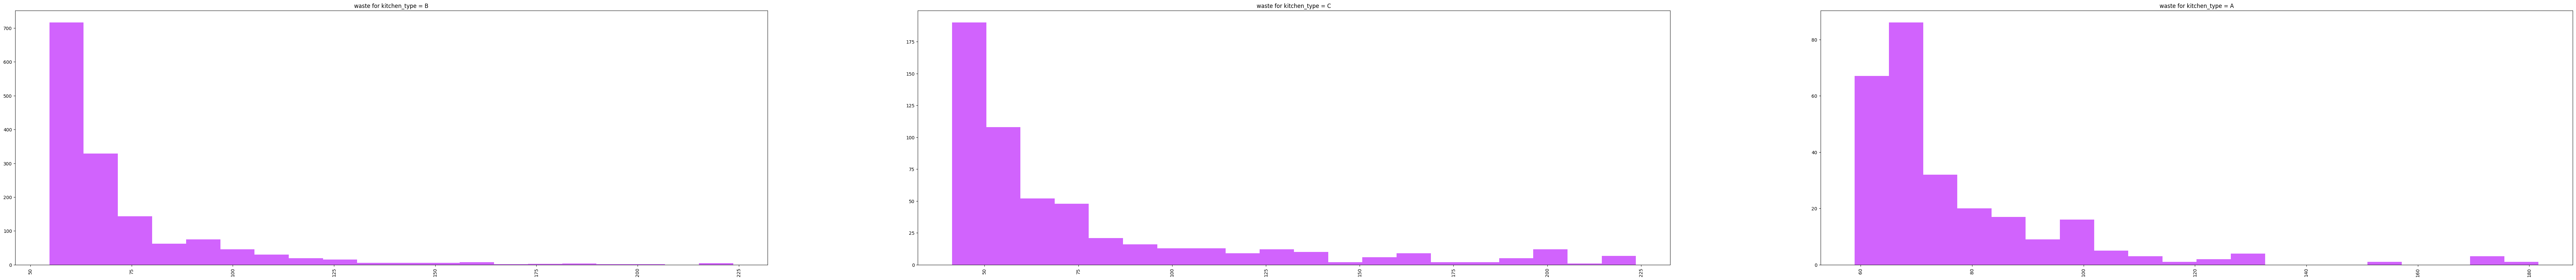

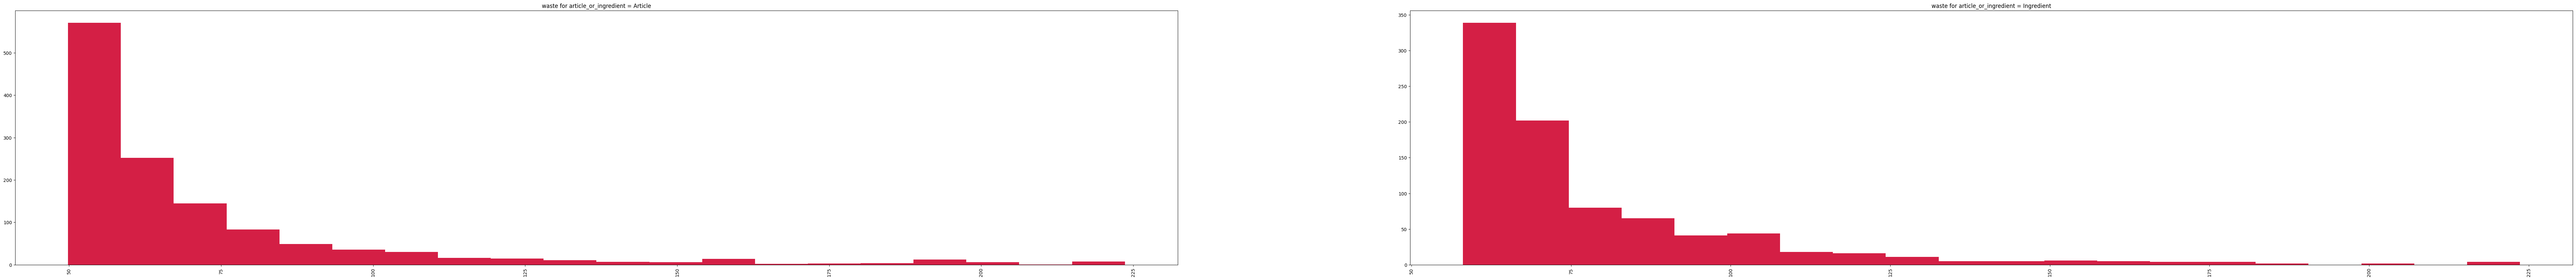

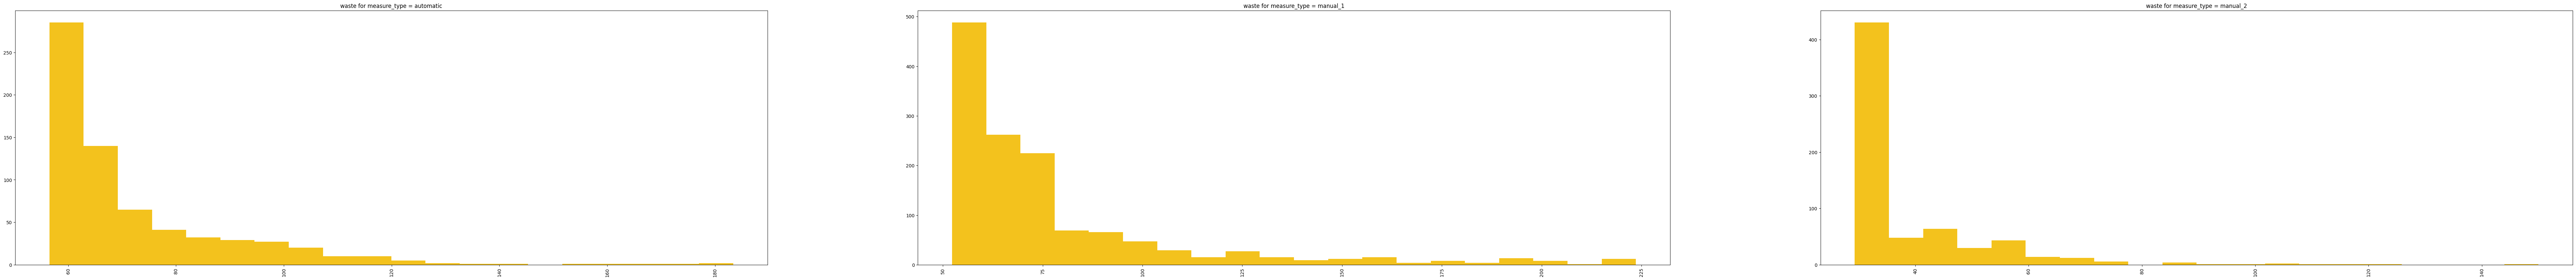

In [105]:
# por cada valor de cada columna categórica plotear un histograma de la variable waste
cols_aux=['food_category','location']
for num_col,i in enumerate(cols):
    fig, ax = plt.subplots(nrows=1, ncols=len(dfCity[i].unique()), figsize=(100, 10))
    for num_val,j in enumerate(dfCity[i].unique()):
        # ploteamos el titulo de cada subplot columna i, valor j, waste
        ax[num_val].set_title('waste for {} = {}'.format(i,j))
        # plotear la curva de densidad con matplot de waste para cada valor de la columna i 
        ax[num_val].hist(findoutliers(dfCity[dfCity[i]==j]['waste']), bins=20,color=colors[num_col])
        # rotar las etiquetas del eje x para cada subplot
        ax[num_val].set_xticklabels(ax[num_val].get_xticklabels(), rotation=90)

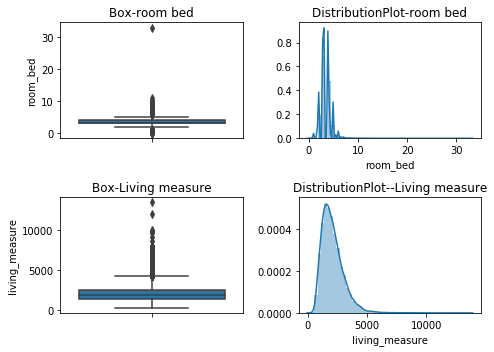

In [40]:
# fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,5))
# axes[0,0].set_title('Box-room bed')
# axes[0,1].set_title('DistributionPlot-room bed')
# axes[1,0].set_title('Box-Living measure')
# axes[1,1].set_title('DistributionPlot--Living measure')

# sn.boxplot(dfCity.room_bed, orient='v',ax=axes[0,0])
# sn.distplot(dfCity.room_bed,ax=axes[0,1]) 
# sn.boxplot(dfCity.living_measure, orient='v',ax=axes[1,0])
# sn.distplot(dfCity.living_measure,ax=axes[1,1]) 

# fig.tight_layout();  # this reduces the space in between the subplots

## Custering 

In [12]:
### Load libraries ###

# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
sns.set()
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Data management libraries
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.vq import vq

import sklearn

In [15]:
#printeame los que corresponden a mas de 1
dfCity.groupby(['item','food_category']).size()[dfCity.groupby(['item','food_category']).size()>1]
#concatename todos los items con varias categorias
dfCity['item_food_category_article_or_ingredient'] = dfCity['item'].astype(str) + '_' + dfCity['food_category'].astype(str)+'_'+dfCity['article_or_ingredient'].astype(str)
dfCity.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste,item_food_category_article_or_ingredient
0,411,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042,411_Extra toppings_Article
1,332,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153,332_Meat_Ingredient
2,874,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053,"874_Potato, Grains & Pasta_Ingredient"
3,508,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216,508_Sandwich_Article
4,345,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006,345_Fruit & Vegetables_Ingredient


In [18]:

from sklearn.covariance import EllipticEnvelope
### Create the Data
#d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])
### The outliers added above are what we want to detect ####
############# Use Mahalanobis distance method to detect them ####
# Define the Elliptic Envelope
d=dfCity.loc[:,['waste','item_food_category_article_or_ingredient']]
d = pd.get_dummies(d, columns=['item_food_category_article_or_ingredient'])
el = sklearn.covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(d)
# Create column that shows anomaly status
d['Anomaly or Not'] = el.predict(d)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['waste'], d['item_food_category_article_or_ingredient'], c = d['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()